In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import KFold
from imblearn.metrics import  geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve, precision_score 
from sklearn.metrics import recall_score, average_precision_score, auc
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN

In [2]:
eye_df = pd.read_csv('C:/Users/kanka/OneDrive/Desktop/Final Project/Datasets/EyeState.csv',  delimiter=',')

eye_df



AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8      FC6       F4       F8      AF4  eyeDetection  
0      4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1      4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2      4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3      4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4      4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  
...        ...      ...      ...      ...      ...      ...           ...  
14975  4203.08  4221.54  4171.28  4269.23  4593.33  4340.51             1  
14976  4194.36  4217.44  4162.56  4259.49  4590.26  4333.33             1  
14977  4193.33  4212.82  4160.51  4257.95  4591.79  4339.49             1  
14978  4200.00  4220.00  4165.64  4267.18  4596.41  4350.77             1  
14979  4212.31  4226.67  4167.69  4274.36  4597.95  4350.77             1  

[14980 rows x 15 columns]

In [3]:
eye_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


Count of records with opened eye state 8257
Count of records with closed eye state 6723


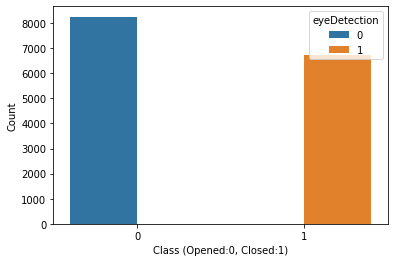

In [4]:
opened, closed = eye_df['eyeDetection'].value_counts()
print('Count of records with opened eye state', opened)
print('Count of records with closed eye state', closed)
sns.countplot(x="eyeDetection", hue="eyeDetection", data=eye_df)
plt.ylabel('Count')
plt.xlabel('Class (Opened:0, Closed:1)')
plt.show()

In [5]:
x= eye_df.drop(['eyeDetection'], axis=1)
x
y = eye_df['eyeDetection']
print(x)


           AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.46   

            P8       T8    

# AIS Algorithm functions

In [6]:
def initilization_of_population_featurebased(size,n_feat):
    population = []
    random.seed(10)
    for j in range(size): 
        chromosome = []    #chromosome type is list
        for i in range(n_feat):
            if i == 0:
                gene = round(random.uniform(4200, 4390))
            elif i == 1:
                gene = round(random.uniform(3900, 4040))
            elif i == 2:
                gene = round(random.uniform(4240, 4300))
            elif i == 3:
                gene = round(random.uniform(4088, 4152))
            elif i == 4:
                gene = round(random.uniform(4320, 4340))
            elif i == 5:
                gene = round(random.uniform(4590, 4540))
            elif i == 6:
                gene = round(random.uniform(4077, 4120))
            elif i == 7:
                gene = round(random.uniform(4590, 4660))
            elif i == 8:
                gene = round(random.uniform(4240, 4229))
            elif i == 9:
                gene = round(random.uniform(4215, 4230))
            elif i == 10:
                gene = round(random.uniform(4115, 4231))
            elif i == 11:
                gene = round(random.uniform(4259, 4265))
            elif i == 12:
                gene = round(random.uniform(4612, 4630))
            else:
                gene = round(random.uniform(4321, 4456))
            chromosome.append(gene)
        population.append(chromosome)
    return(population)

print(initilization_of_population_featurebased(2,14))

In [7]:
def fitness_score(population,model,X_train,X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        a_series = pd.Series(chromosome, index = X_train.columns)
        b_series = pd.Series([1])
        X_train_with_chromosome = X_train.append(a_series, ignore_index=True)
        y_train_with_chromosome = y_train.append(b_series, ignore_index=True)
        model.fit(X_train_with_chromosome,np.ravel(y_train_with_chromosome))
        predictions = model.predict(X_test)
        scores.append(f1_score(np.ravel(y_test), predictions))
    scores, population = np.array(scores), np.array(population) # list of arrays scores = [[array1],[array2]]
    inds = np.argsort(scores) #[2, 3, 1, 0] indicates that the smallest element is at index 2, the next smallest at index 3, then index 1, then index 0.
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) #list of list (converting each array such as array, array2  0 to list in sorted order)

In [8]:
def selection(pop_after_fit,n_parents):
    population_nextgen = [] #New array 
    for i in range(n_parents): 
        population_nextgen.append(pop_after_fit[i])  # append the best chromosomes as parents from results after fit function
    return population_nextgen 

In [9]:
def clone(pop_after_sel, clone_rate):
    population_next_gen_cloned = []
    population_next_gen=pop_after_sel
    for x in range(clone_rate):
            for i in range(len(population_next_gen)):
                clones = population_next_gen[i]
                population_next_gen_cloned.append(clones)
    return population_next_gen_cloned
    

In [10]:
def mutation_clone(pop_after_clone,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_clone)):  #consider each chromoseome from the cross over set
        chromosome = pop_after_clone[i]  #take in sequence one after other chromosomes
        for j in range(len(chromosome)):  #with the one chromosome array
            if j == 0:  #Up to us can be anything here we see if randomly generated value < mutate
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 1:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 2:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 3:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 4:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate)),1)
            elif j== 5:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 6:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 7:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 8:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 9:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 10:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 11:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            elif j== 12:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate )),1)
            else:
                chromosome[j] = round(float(chromosome[j] + (mutation_rate * 12.9)),1)
        population_nextgen.append(chromosome)  #append all the changed ones to next_gen
    
    return population_nextgen

In [11]:
def generations(size,n_feat,n_parents,mutation_rate, clone_rate,model,X_train,X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    stop_condition = True
    i = 0
    fscore_counter = 0
    bestscore_counter = 0
    population_nextgen=initilization_of_population_featurebased(size,n_feat)
    print('Initial random population based on minority class features')
    print(population_nextgen)
    while stop_condition:
        print(i)
        print('--------------------------------------------------------------------------')
        scores, pop_after_fit = fitness_score(population_nextgen, model,X_train,X_test, y_train, y_test)
        print('Scores of each chromosomes in sorted order')
        print(scores)
        print('Chromosome set sorted and corresponding to scores')
        print(pop_after_fit)
        pop_after_sel = selection(pop_after_fit,n_parents)
        print('Selects the best parents to generate better chromosomes for next generation')
        print(pop_after_sel)
        print("Clone after selection based on clone_rate")
        pop_after_clone = clone(pop_after_sel, clone_rate)
        print(pop_after_clone)
        print('Mutate the cloned population')
        population_nextgen = mutation_clone(pop_after_clone,mutation_rate)
        print(population_nextgen)
        if i > 0:
             if round(best_score[-1],5) >= round(scores[0],5):
                    print("Checking if the values are degrading or equal")
                    fscore_counter = fscore_counter + 1
                    print(fscore_counter)
                    if fscore_counter == 10 :
                        print("&&&&&&&&&--------Fscore_counter is checked and near to 10--------&&&&&&&&&&&&&")
                        stop_condition = False
                        
             elif stop_condition == True:
                if round(best_score[-1],5) < round(scores[0],5):
                    print("&&&&&&&&&&&&&&-----Fscore_counter is recompiled to O-------&&&&&&&&&&&&&&&&&")
                    fscore_counter = 0
             if stop_condition == True:
                if len(best_score) > 150:
                    print("-----Length of best score is exceeded so stopping the AIS now--------")
                    stop_condition = False
             #else:
               # stop_condition = True
                    
        i = i + 1
        
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
        print('best score and chromosome')
        print(best_chromo)
        print(best_score)
        
    return best_chromo, best_score

In [12]:
def update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train):
    X_train = Initial_X_train
    y_train = Initial_y_train
    for best_chromo in chromo:
        X_train_bestchromo = []
        a_series = pd.Series(best_chromo, index = X_train.columns)
        X_train_bestchromo = X_train.append(a_series, ignore_index=True)
        X_train = X_train_bestchromo
        y_train_bestchromo = y_train.append(pd.DataFrame([1]))
        y_train = y_train_bestchromo
    return X_train, y_train

In [13]:
def modelling_using_AIS_SampledTrainset(AIS_X_train, AIS_y_train, AIS_X_test, AIS_y_test,classifier):
    model = classifier
    model.fit(AIS_X_train,np.ravel(AIS_y_train))
    predictions = model.predict(AIS_X_test)
    acc, recal, precis, aucroc, gmean, _val = evaluation(predictions, AIS_y_test)
    
    return acc, recal, precis, aucroc, gmean, _val
    
    

In [14]:
def evaluation(pred_values, y_test):
    
    acc = accuracy_score(np.ravel(y_test), pred_values)
    recal = recall_score(np.ravel(y_test), pred_values)
    precis = precision_score(np.ravel(y_test), pred_values)
    #val = f1_score(y_test, pred_values)
    aucroc = roc_auc_score(np.ravel(y_test), pred_values)
    _val = f1_score(np.ravel(y_test), pred_values)
    gmean = geometric_mean_score(np.ravel(y_test), pred_values)
    
    return acc, recal, precis, aucroc, gmean, _val

# AIS algorithm on Train and Test datasets function

In [18]:
def AIS_sampling_and_modelling(x,y,model,size,n_feat,n_parents,mutation_rate,clone_rate,foldvalue):
    kf = KFold(n_splits=foldvalue, shuffle = True, random_state=1)
    k = foldvalue
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    classifier = model
    for train_index , test_index in kf.split(x):
        print('--------------------------*****START OF FOLD*******--------------------------------------')
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        Initial_X_train = X_train
        Initial_y_train = y_train
        print('Population generation using {0} Classifier'.format(model))
        print('------------------******AIS STARTED****---------------------------------------------')
        chromo,score=generations(size=size,n_feat=n_feat,n_parents=n_parents,mutation_rate=mutation_rate,clone_rate=clone_rate,
                     model = model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
        print('-----------------------***AIS ENDED****---------------------------------------------')
        X_train_AISsampled, y_train_AISsampled = update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train)
        print('-------------------******METRICS CALCULATION FOR THIS FOLD STARTED*****--------------')
        acc, recal, precis, aucroc, gmean, _val = modelling_using_AIS_SampledTrainset(X_train_AISsampled, y_train_AISsampled, X_test, y_test, model)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        print('-------------*******CALCULATED METRICS FOR THIS FOLD***--------------')
        print('-----------------------****END OF FOLD*****------------------------------------------------')                  
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0} using AIS algorithm'.format(classifier))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
        

In [19]:
def AIS_with_resampling(x,y,model,sampler,size,n_feat,n_parents,mutation_rate,clone_rate,foldvalue):
    kf = KFold(n_splits=foldvalue, shuffle = True, random_state=1)
    k = foldvalue
    acc_score = []
    recal_score = []
    pres_score = []
    _fscore = []
    aucroc_score = []
    gmean_score = []
    classifier = model
    sampleclassifier = sampler
    for train_index , test_index in kf.split(x):
        print('--------------------------*****START OF FOLD*******--------------------------------------')
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        Initial_X_train = X_train
        Initial_y_train = y_train
        print('Population generation using {0} Classifier'.format(model))
        print('------------------******AIS STARTED****---------------------------------------------')
        chromo,score=generations(size=size,n_feat=n_feat,n_parents=n_parents,mutation_rate=mutation_rate,clone_rate=clone_rate,
                     model = model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)
        print('-----------------------***AIS ENDED****---------------------------------------------')
        X_train_AISsampled, y_train_AISsampled = update_AIS_GeneratedSample_in_TrainSet(chromo,Initial_X_train,Initial_y_train)
        print('----------------*****Applying sampling {0} technique on updated AIS train datasets******----------'.format(sampleclassifier))
        AIS_X_train_sampled, AIS_y_train_sampled = sampleclassifier.fit_resample(X_train_AISsampled, np.ravel(y_train_AISsampled))
        print('-------------------******METRICS CALCULATION FOR THIS FOLD STARTED*****--------------')
        acc, recal, precis, aucroc, gmean, _val = modelling_using_AIS_SampledTrainset(AIS_X_train_sampled, AIS_y_train_sampled, X_test, y_test, model)
        acc_score.append(acc)
        recal_score.append(recal)
        pres_score.append(precis)
        _fscore.append(_val)
        aucroc_score.append(aucroc)
        gmean_score.append(gmean)
        print('-------------*******CALCULATED METRICS FOR THIS FOLD***--------------')
        print('-----------------------****END OF FOLD*****------------------------------------------------')                  
    avg_acc_score = sum(acc_score)/k
    avg_recal_score = sum(recal_score)/k
    avg_precis_score = sum(pres_score)/k
    avg_f_score = sum(_fscore)/k
    avg_auc_score = sum(aucroc_score)/k
    avg_gmean_score = sum(gmean_score)/k
    print('Metrics for each fold of {0} using AIS algorithm'.format(classifier))
    print('Accuracy : {0}'.format(acc_score))
    print('Avg accuracy : {}'.format(avg_acc_score))
    print('Recall : {0}'.format(recal_score))
    print('Avg recall : {}'.format(avg_recal_score))
    print('Precision : {0}'.format(pres_score))
    print('Avg precision : {}'.format(avg_precis_score))
    print('F1_score : {0}'.format(_fscore))
    print('Avg f-score : {}'.format(avg_f_score))
    print('AUC_ROC : {0}'.format(aucroc_score))
    print('Avg AUC_ROC : {}'.format(avg_auc_score))
    print('Geometric mean : {0}'.format(gmean_score))
    print('Avg gmean : {}'.format(avg_gmean_score))
        

In [17]:
RandomForestModel = RandomForestClassifier(random_state = 24)
random.seed(1)

AIS_sampling_and_modelling(x,y,model = RandomForestModel,size = 10,n_feat = 14 ,n_parents = 6,mutation_rate = 0.10,
                           clone_rate = 6,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using RandomForestClassifier(random_state=24) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 4620, 4380]

In [18]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostModel = AdaBoostClassifier()

In [19]:
random.seed(1)

AIS_sampling_and_modelling(x,y,model = AdaBoostModel,size = 10,n_feat = x.shape[1] ,n_parents = 6,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using AdaBoostClassifier() Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 4620, 4380], [4295, 3963, 4284

In [20]:
lgbmodel = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)

In [21]:
random.seed(1)

AIS_sampling_and_modelling(x,y,model = lgbmodel,size = 10,n_feat =x.shape[1] ,n_parents = 6,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using LGBMClassifier(objective='binary', random_state=0) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 

# Resampling + AIS

In [21]:
sampler_smt = SMOTE(random_state=0)


In [24]:
AIS_with_resampling(x,y,model = AdaBoostModel,sampler = sampler_smt,size = 10,n_feat =x.shape[1] ,n_parents = 8,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using AdaBoostClassifier() Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 4620, 4380], [4295, 3963, 4284

In [25]:
AIS_with_resampling(x,y,model = RandomForestModel,sampler = sampler_smt,size = 10,n_feat =x.shape[1] ,n_parents = 8,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using RandomForestClassifier(random_state=24) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 4620, 4380]

In [16]:
from imblearn.under_sampling import RandomUnderSampler
RandomForestModel = RandomForestClassifier(random_state = 24)
sampler_random_under = RandomUnderSampler()

In [20]:
AIS_with_resampling(x,y,model = RandomForestModel,sampler = sampler_random_under,size = 10,n_feat =x.shape[1] ,n_parents = 8,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using RandomForestClassifier(random_state=24) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 4620, 4380]

# LGB+AIS+SMT

In [22]:
lgbmodel = lgb.LGBMClassifier(objective='binary', random_state=0, n_jobs=-1)

In [23]:
AIS_with_resampling(x,y,model = lgbmodel,sampler = sampler_smt,size = 10,n_feat =x.shape[1] ,n_parents = 8,mutation_rate = 0.10,
                           clone_rate = 6 ,foldvalue = 5)

--------------------------*****START OF FOLD*******--------------------------------------
Population generation using LGBMClassifier(objective='binary', random_state=0) Classifier
------------------******AIS STARTED****---------------------------------------------
Initial random population based on minority class features
[[4309, 3960, 4275, 4101, 4336, 4549, 4105, 4601, 4234, 4220, 4144, 4265, 4630, 4327], [4363, 3984, 4263, 4106, 4333, 4567, 4106, 4636, 4239, 4227, 4229, 4265, 4623, 4327], [4201, 3919, 4296, 4107, 4327, 4545, 4091, 4628, 4235, 4216, 4183, 4264, 4615, 4351], [4278, 3905, 4270, 4140, 4333, 4563, 4114, 4600, 4234, 4221, 4185, 4260, 4626, 4334], [4232, 4013, 4297, 4116, 4328, 4578, 4089, 4633, 4238, 4217, 4168, 4260, 4624, 4432], [4348, 3967, 4261, 4116, 4320, 4554, 4091, 4612, 4239, 4222, 4183, 4261, 4628, 4412], [4246, 3974, 4295, 4121, 4332, 4587, 4098, 4622, 4236, 4221, 4183, 4262, 4621, 4343], [4284, 4036, 4265, 4090, 4320, 4563, 4079, 4596, 4239, 4222, 4230, 4262, 